In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.fft import fft2, ifft2, fftshift


In [6]:
# Loading the image and converting into to the grayscale
img = Image.open('dip.jpg').convert('L')
img_array = np.array(img)

# Normalizing the image
img_array = img_array / 255.0  

# Applying the Fourier Transform
f_transform = fft2(img_array)
f_transform_shifted = fftshift(f_transform)  # Shift the zero frequency component to the center

magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)  # Adding 1 to avoid log(0)



In [7]:
def gaussian_filter(shape, sigma):
    """Creating a Gaussian filter."""
    rows, cols = shape
    x = np.linspace(-cols//2, cols//2, cols)
    y = np.linspace(-rows//2, rows//2, rows)
    x, y = np.meshgrid(x, y)
    gauss = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    return gauss / np.max(gauss)  

def butterworth_filter(shape, cutoff, order):
    """Creating a Butterworth filter."""
    rows, cols = shape
    x = np.linspace(-cols//2, cols//2, cols)
    y = np.linspace(-rows//2, rows//2, rows)
    x, y = np.meshgrid(x, y)
    D = np.sqrt(x**2 + y**2)
    H = 1 / (1 + (D / cutoff)**(2 * order))
    return H  # Return the filter



In [8]:
gaussian = gaussian_filter(img_array.shape, sigma=10)
butterworth = butterworth_filter(img_array.shape, cutoff=30, order=2)

# Applying the filters in the frequency domain
filtered_gaussian = f_transform_shifted * gaussian
filtered_butterworth = f_transform_shifted * butterworth

# Inverse Fourier Transform 
img_gaussian_filtered = np.abs(ifft2(fftshift(filtered_gaussian)))
img_butterworth_filtered = np.abs(ifft2(fftshift(filtered_butterworth)))



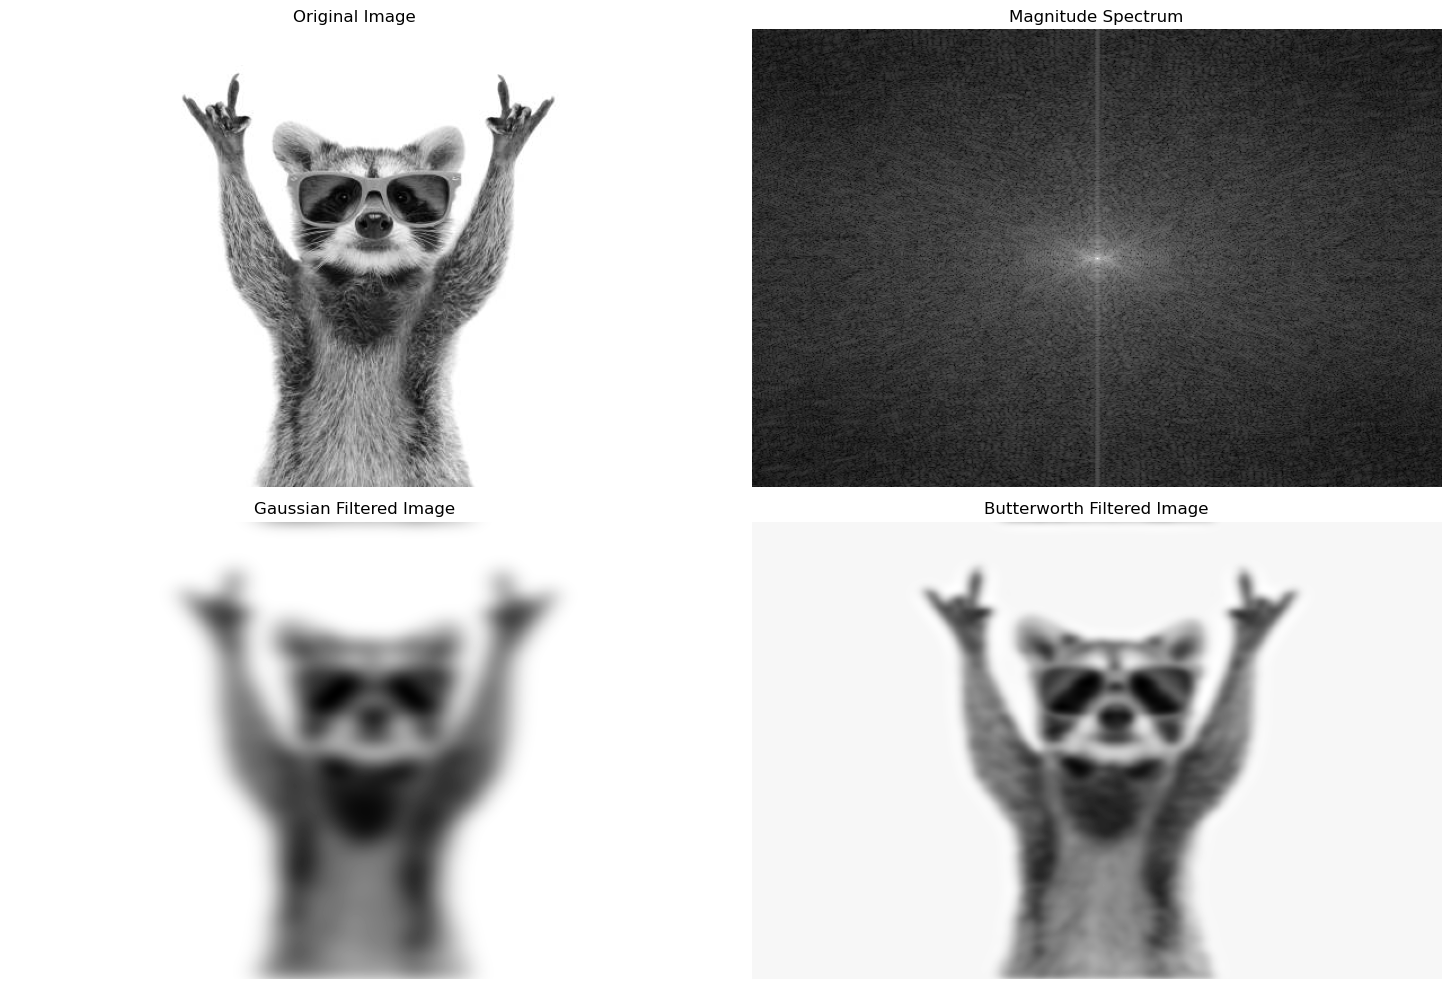

In [9]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(img_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(img_gaussian_filtered, cmap='gray')
plt.title('Gaussian Filtered Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(img_butterworth_filtered, cmap='gray')
plt.title('Butterworth Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()
